In [1]:
from jax_circuits import *
from scipy.stats import unitary_group
import matplotlib.pyplot as plt

from qiskit import transpile
from qiskit.quantum_info import Operator

from penalty import *
from topology import *

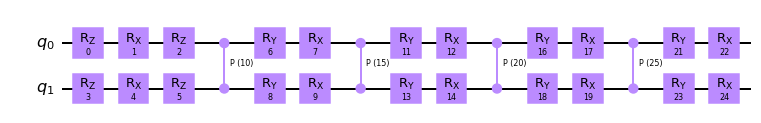

In [32]:
a = Ansatz(2, 'cp', fill_layers(sequ_layer(2), 4))
angs = jnp.array(list(range(a.num_angles)))
a.circuit(angs).draw(output='mpl')

In [39]:
penalty_options = {'function': 'linear', 
                   'height':2,
                   'regularization': 1e-3,
                   'threshold': 0.1,
                   'angles': control_angles(a.num_angles, a.num_qubits, 'cp')}

In [50]:
u_target = unitary_group.rvs(4, random_state=0)
angles_history, loss_history = a.learn(u_target, regularization_options=penalty_options)

angles_history = jnp.array(angles_history)
loss_history = jnp.array(loss_history)

disc_history =  vmap(jit(lambda angs: disc(a.unitary(angs), u_target)))(angles_history)
reg_history = vmap(jit(lambda angs: penalty(angs, penalty_options)))(angles_history)

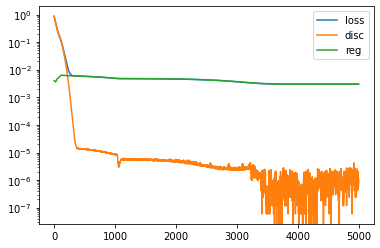

In [56]:
plt.plot(loss_history, label='loss')
plt.plot(disc_history, label='disc')
plt.plot(reg_history, label='reg')
plt.legend()
plt.yscale('log')